In [1]:
import pandas as pd

In [32]:
cases = pd.read_csv('src/cases.csv',sep=';')
cases['Номер поручения']=cases['\ufeffНомер поручения']
marks = pd.read_csv('src/marks.csv',sep=';')
diaries = pd.read_csv('src/diaries.csv',sep=';')

### Уникальные значения для ролей, героев и записей в дневниках

In [86]:
diaries['Роль'].unique()

array(['рейнджер', 'следопыт', 'лекарь', 'лучник', 'мечник', 'боевой маг'],
      dtype=object)

In [79]:
diaries['Запись в дневнике'].unique()

array(['разжечь костёр', 'выследить цель', 'залечить раны',
       'найти пропажу', 'отыскать заказчика'], dtype=object)

In [77]:
diaries['Герой'].unique()

array(['Мартин', 'Альфред', 'Юлия', 'Агата', 'Фредерик', 'Соня',
       'Пастушок', 'Леопольд', 'Бендер', 'Глюкоза', 'Бенедикт',
       'Синеглазый'], dtype=object)

In [80]:
diaries[(diaries["Запись в дневнике"] == "разжечь костёр") &  (diaries["Герой"] == "Альфред")]


,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль,Выполнено
2,11001,Альфред,разжечь костёр,1,рейнджер,да
55,11041,Альфред,разжечь костёр,1,рейнджер,да
126,11111,Альфред,разжечь костёр,1,рейнджер,да
235,11195,Альфред,разжечь костёр,1,рейнджер,да
242,11200,Альфред,разжечь костёр,1,рейнджер,да
272,11220,Альфред,разжечь костёр,1,рейнджер,да
294,11237,Альфред,разжечь костёр,1,рейнджер,да
317,11257,Альфред,разжечь костёр,1,рейнджер,да
457,11371,Альфред,разжечь костёр,1,рейнджер,да
506,11418,Альфред,разжечь костёр,1,рейнджер,да


### Характеристики героев по ролям и записям в дневнике, кто в какой роли чаще

In [ ]:
# Радарная диаграмма для записей в дневнике для каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = [action for action in diaries['Запись в дневнике'].unique() if action != 'разжечь костёр']

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[(diaries['Герой'] == hero) & (diaries['Запись в дневнике'] != 'разжечь костёр')]['Запись в дневнике'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Запись в дневнике для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_radar(hero)


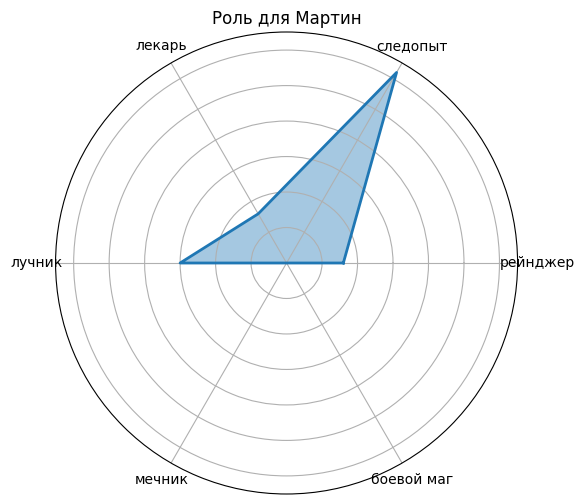

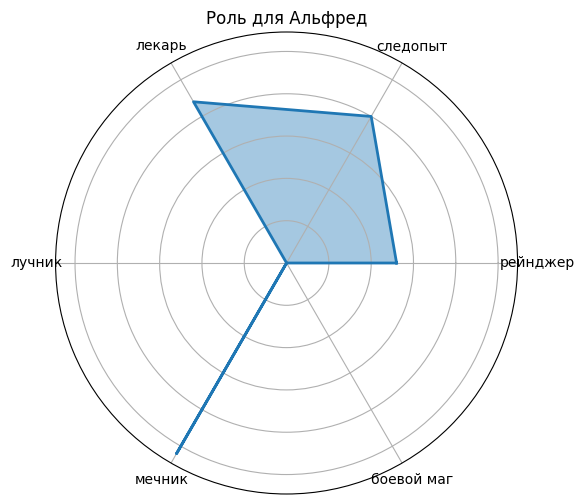

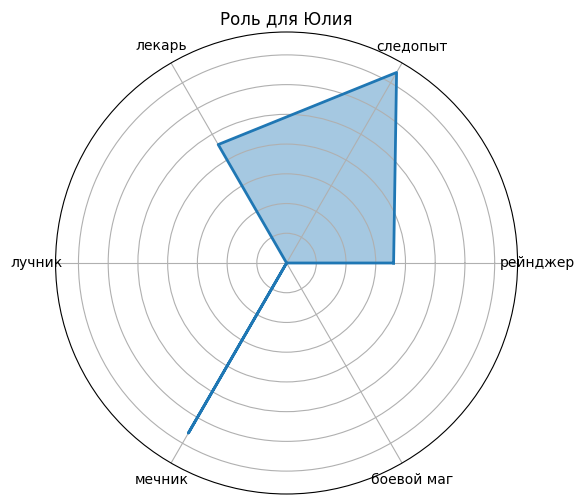

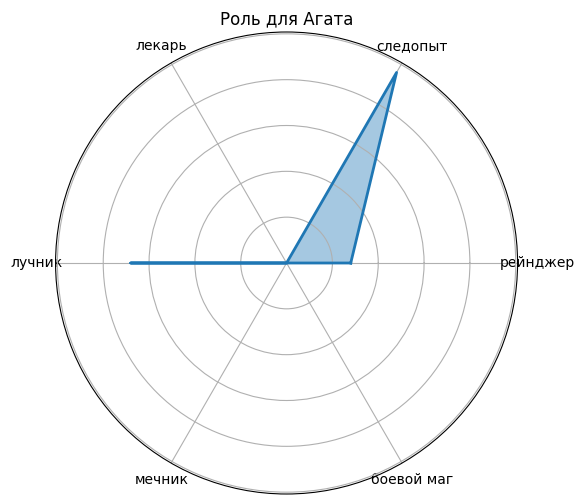

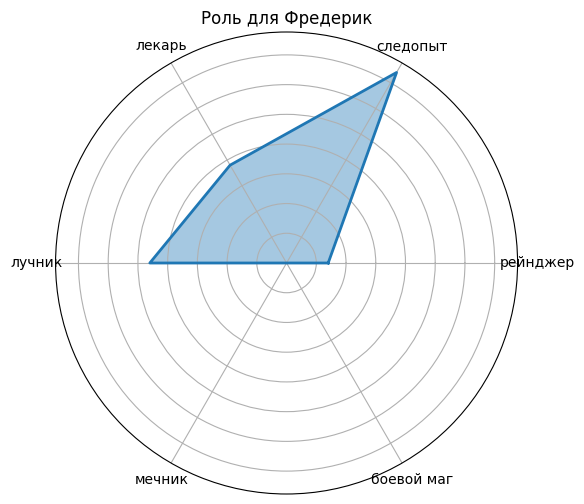

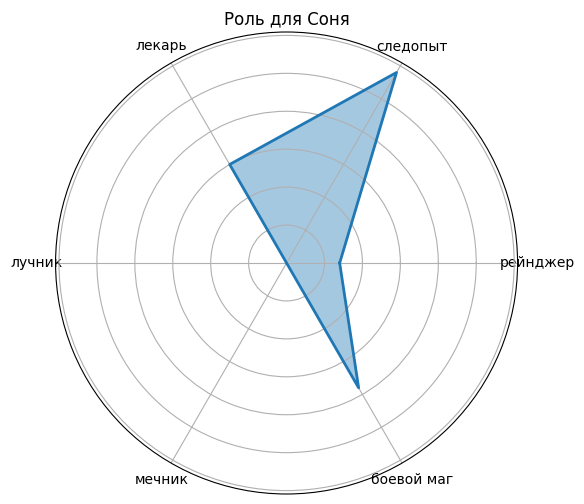

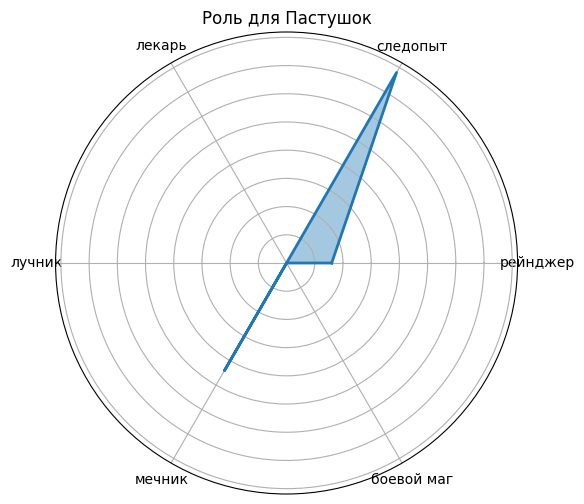

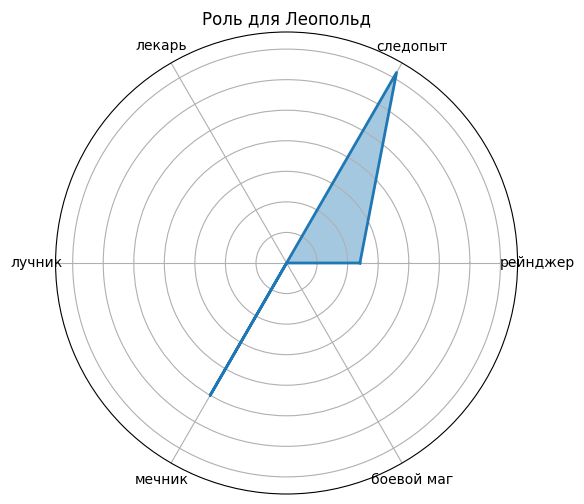

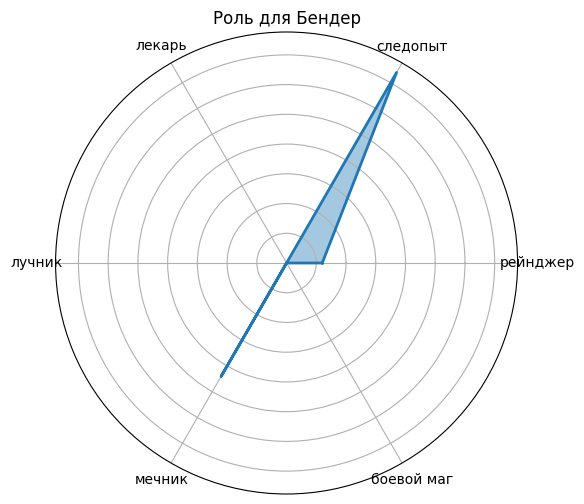

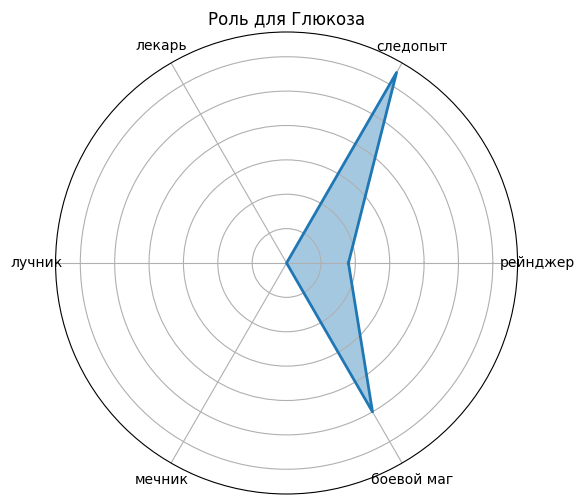

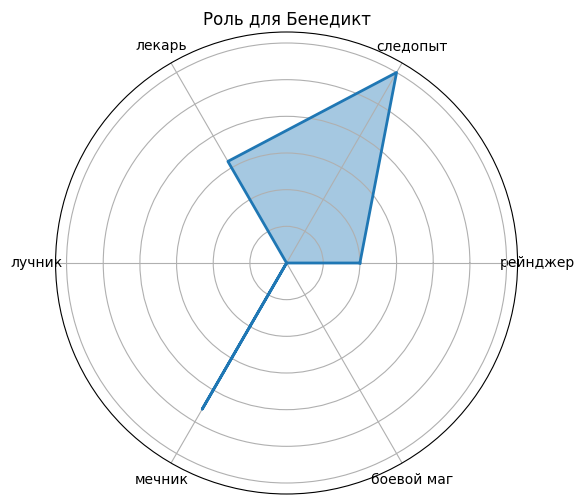

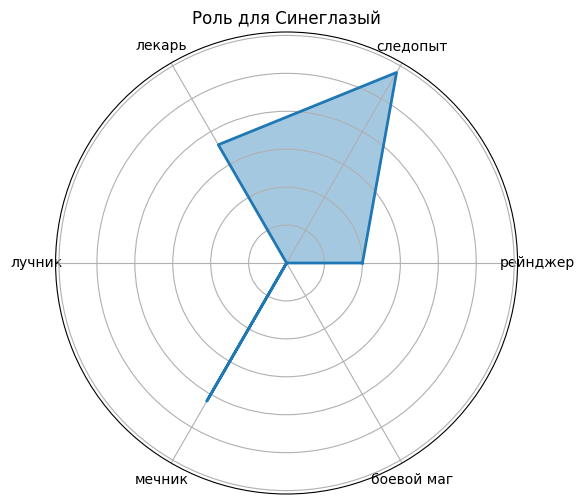

In [67]:
# Радарная диаграмма для ролей каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = diaries['Роль'].unique()

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[diaries['Герой'] == hero]['Роль'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Роль для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_radar(hero)


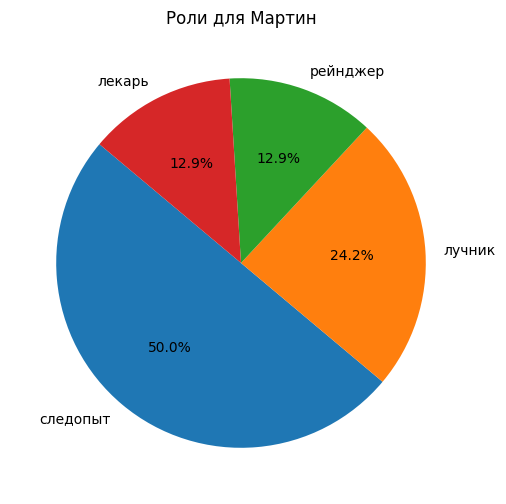

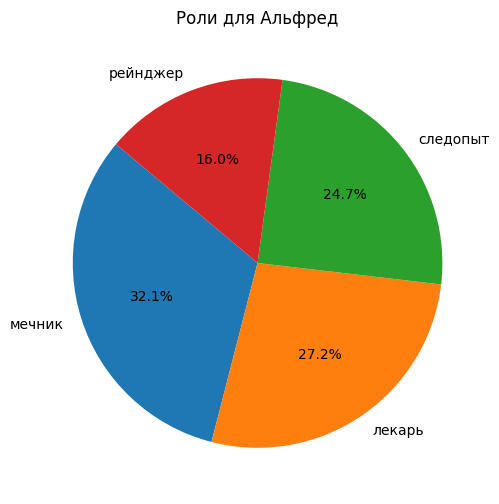

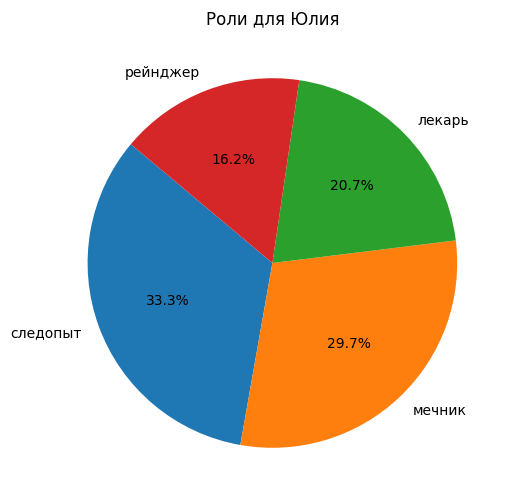

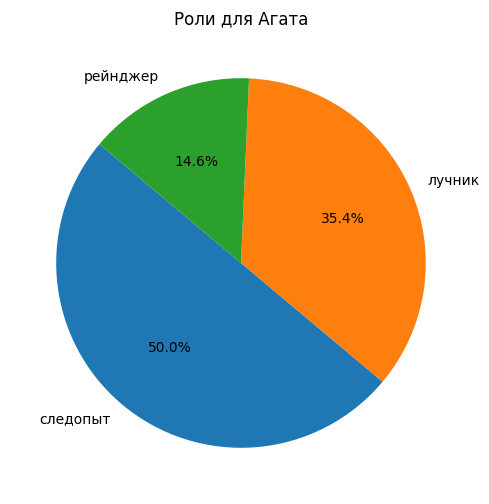

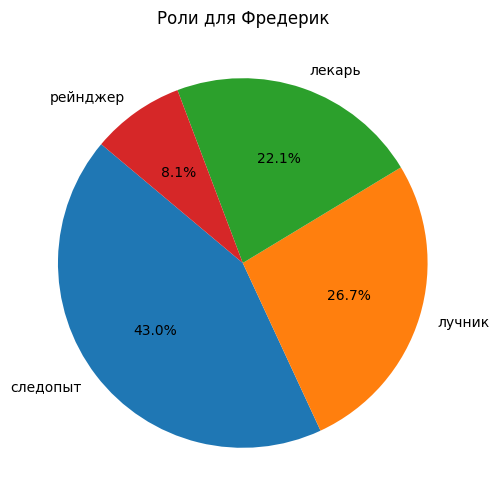

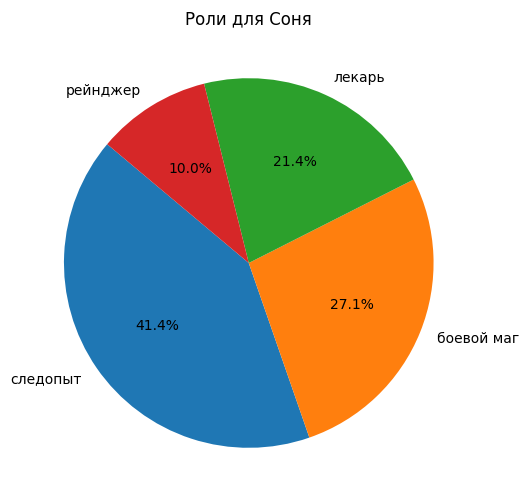

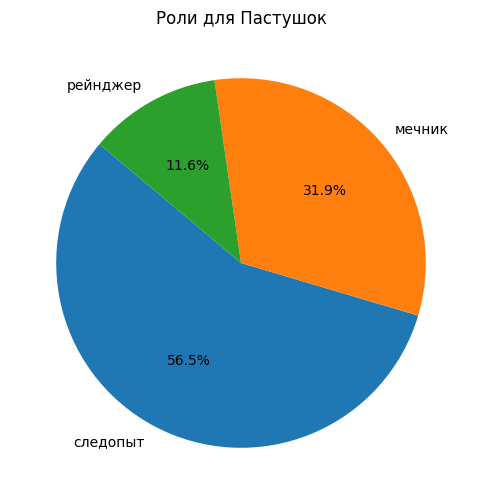

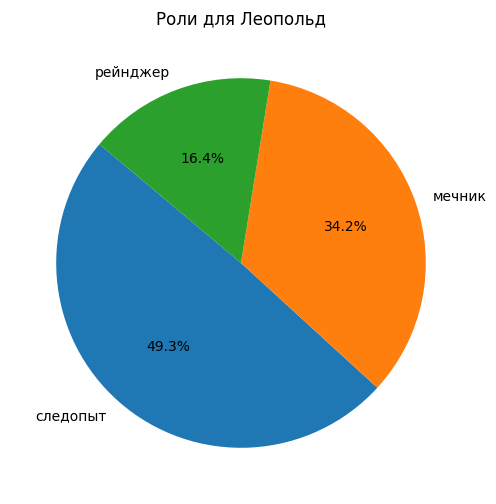

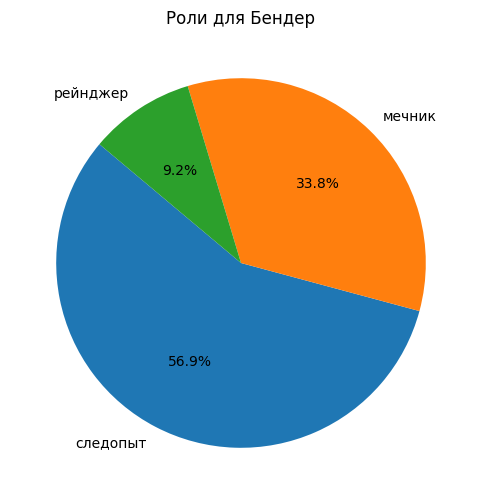

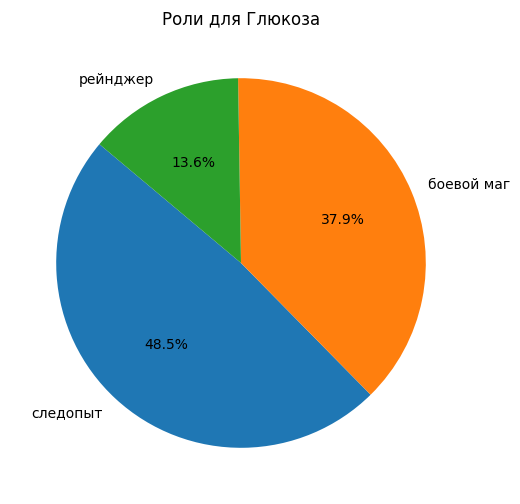

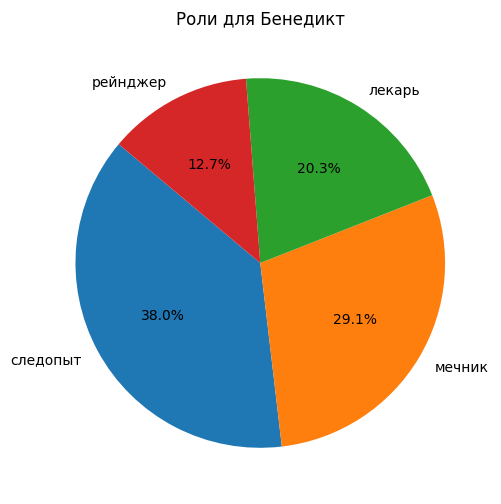

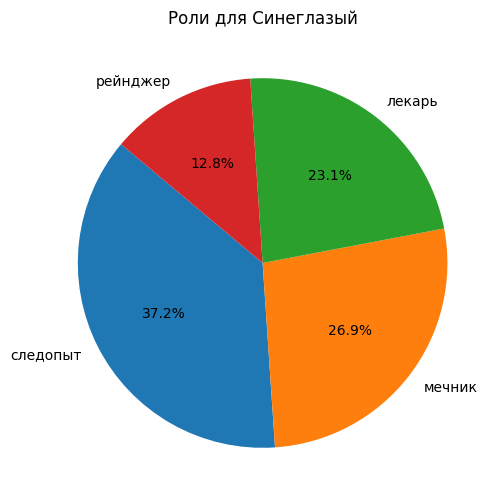

In [ ]:
# Круговая диаграмма для ролей каждого героя
import pandas as pd
import matplotlib.pyplot as plt

# Уникальные герои и роли
heroes = diaries['Герой'].unique()
roles = diaries['Роль'].unique()

# Функция для построения круговой диаграммы для каждого героя
def plot_pie(hero):
    # Подсчитываем частоту ролей для героя
    hero_roles = diaries[diaries['Герой'] == hero]['Роль'].value_counts()
    
    # Построение круговой диаграммы
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(hero_roles, labels=hero_roles.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Роли для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_pie(hero)


### Можно ли выполнять задание (заметку) в разных ролях?

In [81]:
# Группируем данные по номеру поручения и проверяем количество уникальных ролей в каждой группе
roles_per_mission = diaries.groupby('Номер поручения')['Роль'].nunique()

# Отбираем только те поручения, где есть более одной уникальной роли
missions_with_multiple_roles = roles_per_mission[roles_per_mission > 1]

# Выводим результаты
if not missions_with_multiple_roles.empty:
    print("Номера поручений с разными ролями:")
    print(missions_with_multiple_roles)
else:
    print("Для каждого поручения указана только одна роль.")


Номера поручений с разными ролями:
Номер поручения
11000    3
11001    3
11005    2
11006    2
11007    2
        ..
11495    3
11496    3
11497    2
11498    2
11499    2
Name: Роль, Length: 199, dtype: int64


In [85]:
diaries[diaries["Номер поручения"] ==11001]

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль,Выполнено
2,11001,Альфред,разжечь костёр,1,рейнджер,да
3,11001,Альфред,залечить раны,18,лекарь,да
618,11001,Альфред,разжечь костёр,2,мечник,да


Да, можно. Более того, есть зависимость времени от роли для определённой задачи